In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_gaussian_quantiles, make_moons, make_blobs
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression

## sklearn data

In [2]:
#easy to separate
samp = 100000
X1, y1 = make_blobs(n_samples = samp, centers = 2, n_features=2, random_state=42)

In [3]:
def plot_data(X, y):
    fig, ax = plt.subplots(figsize = (8,6))
    X1 = X[:, 0][y==0]
    y1 = X[:, 1][y==0]
    X2 = X[:, 0][y==1]
    y2 = X[:, 1][y==1]
    plt.plot(X1, y1, 'o')
    plt.plot(X2, y2, '^')

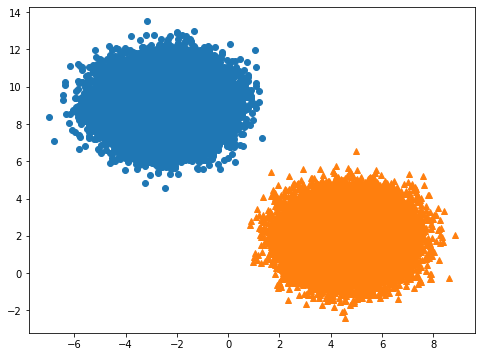

In [4]:
plot_data(X1, y1)

In [5]:
#slightly harder to separate
X2, y2 = make_moons(n_samples = samp, noise = .75, random_state = 42)

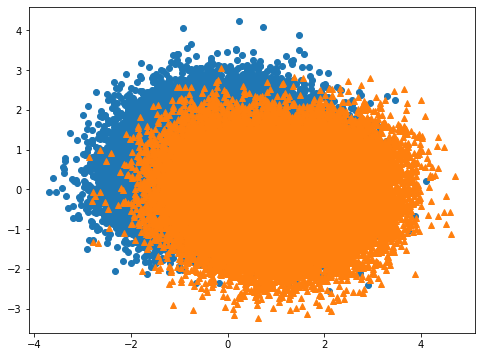

In [6]:
plot_data(X2, y2)

In [7]:
#extreme hard case
X3, y3 = make_gaussian_quantiles(n_samples = samp, n_features=2, n_classes=2, random_state = 42)

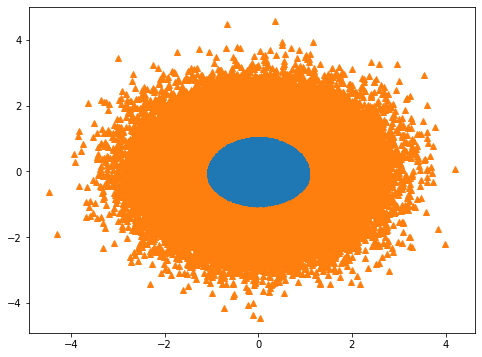

In [8]:
plot_data(X3, y3)

# Import Model

In [16]:
def compare(X, y):
    # Training 
    start1 = time.time()
    w, b, l = train(X, y, bs=100, epochs=1000, lr=0.001)
    pred = predict(X, w, b)
    acc = accuracy(y, pred)
    end1 = time.time()
    print(f'Time to run our logistic regression: {end1 - start1} s')
    print(f'Accuracy of our logistic regression: {acc}')
    
    
    start2 = time.time()
    lr = LogisticRegression()
    lr.fit(X, y)
    sk_acc = lr.score(X, y)
    end2 = time.time()
    print(f'Time to run Sklearn implementation {end2 - start2} s')
    print(f'Accuracy of Sklearn implementation: {sk_acc}')
    
    print(f'\nDifference in accuracies: {np.abs(acc-sk_acc)}')
    
    return w

In [17]:
w1 = compare(X1, y1)

Time to run our logistic regression: 0.053503990173339844 s
Accuracy of our logistic regression: 0.99
Time to run Sklearn implementation 0.004835844039916992 s
Accuracy of Sklearn implementation: 1.0

Difference in accuracies: 0.010000000000000009


In [18]:
w2 = compare(X2, y2)

Time to run our logistic regression: 0.06345725059509277 s
Accuracy of our logistic regression: 0.75
Time to run Sklearn implementation 0.003736734390258789 s
Accuracy of Sklearn implementation: 0.76

Difference in accuracies: 0.010000000000000009


In [19]:
w3 = compare(X3, y3)

Time to run our logistic regression: 0.06667590141296387 s
Accuracy of our logistic regression: 0.51
Time to run Sklearn implementation 0.0036568641662597656 s
Accuracy of Sklearn implementation: 0.51

Difference in accuracies: 0.0
